In [1]:
#Basic Libraries
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

#ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

#Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load the dataset 
df = pd.read_csv('heart.csv')

# Preview the data
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Dataset contains 918 rows and 12 columns

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

 Missing values:

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG     

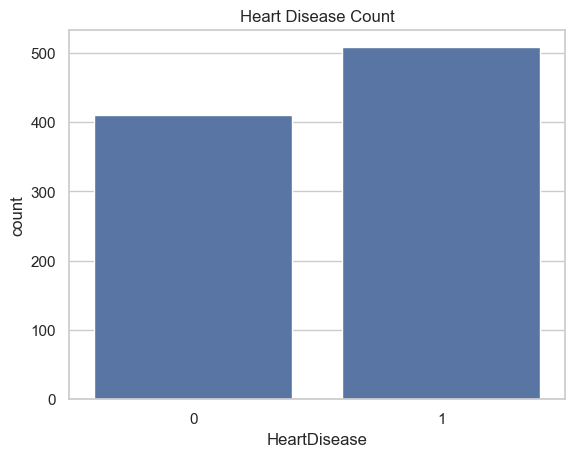

In [7]:
#Shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

#Data types
print("\nInfo:")
df.info()

#Check for missing values
print("\n Missing values:\n")
print(df.isnull().sum())

#Basic Statistics
print("\n Summary Statistics:")
df.describe()

#Dsitribution of the target variable
print("\n Target Variable Distribution:")
print(df['HeartDisease'].value_counts())
sns.countplot(data=df, x='HeartDisease')
plt.title("Heart Disease Count")
plt.show()

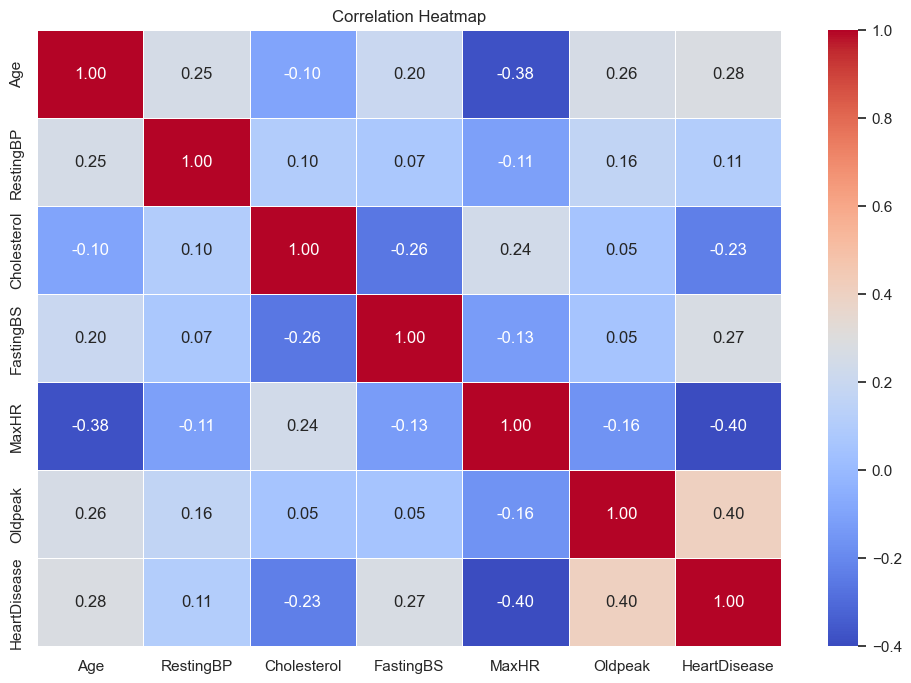

In [9]:
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(12,8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths =0.5)
plt.title("Correlation Heatmap")
plt.show()

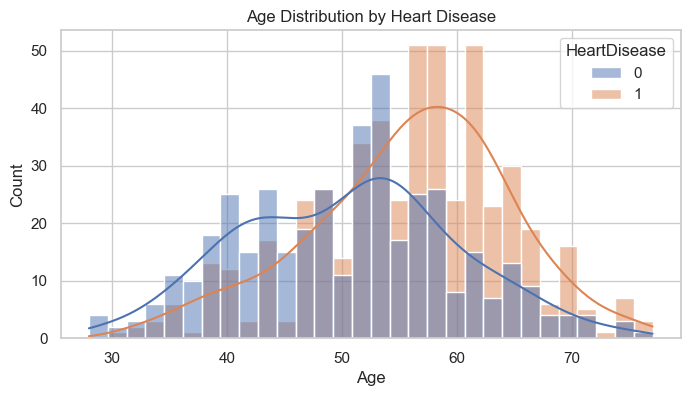

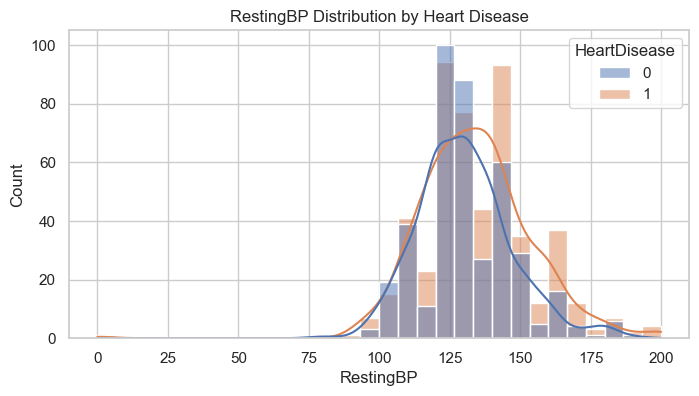

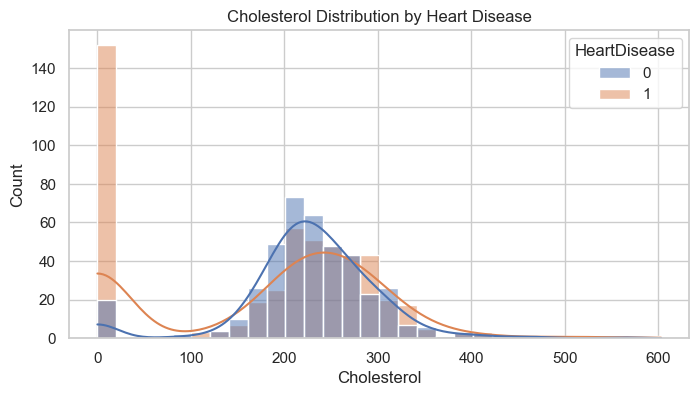

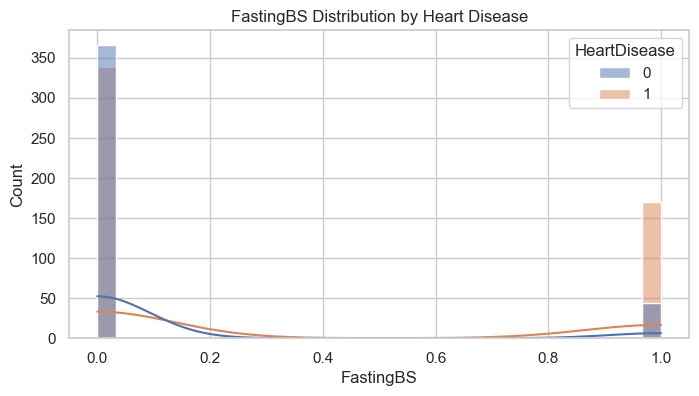

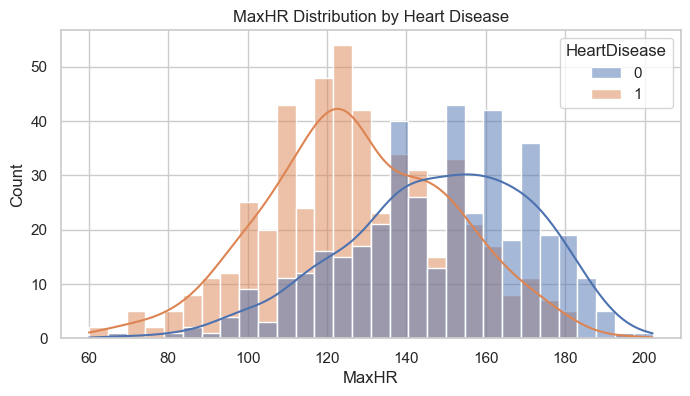

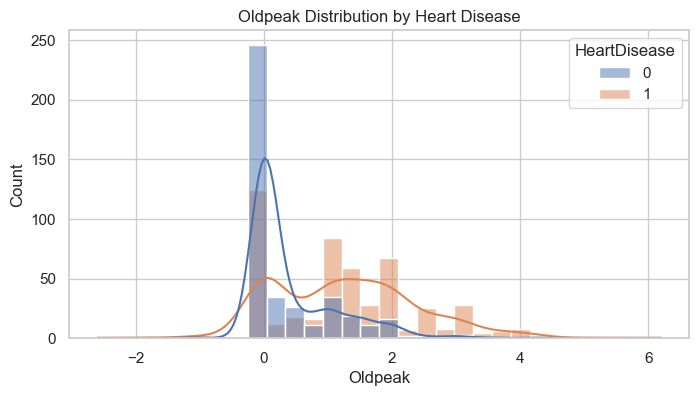

In [11]:
numeric_features = [col for col in numeric_df.columns.tolist() if col !='HeartDisease']

for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue="HeartDisease", kde=True, bins=30)
    plt.title(f"{col} Distribution by Heart Disease")
    plt.show()


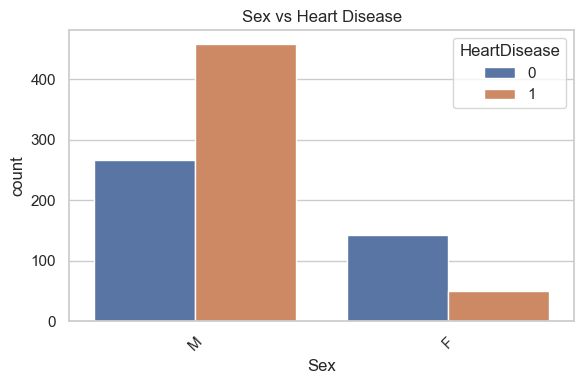

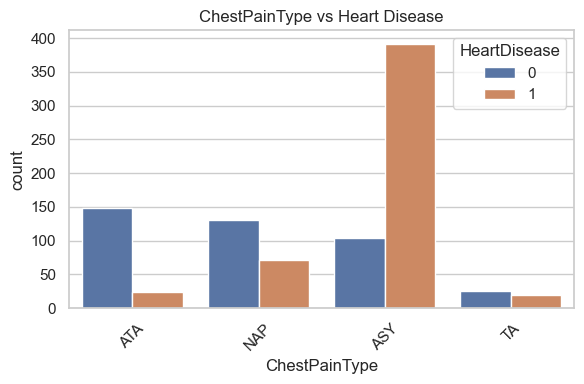

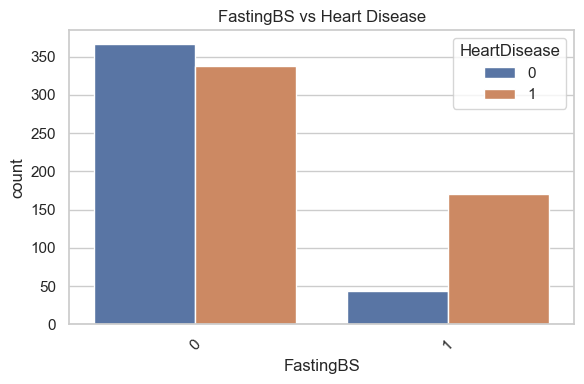

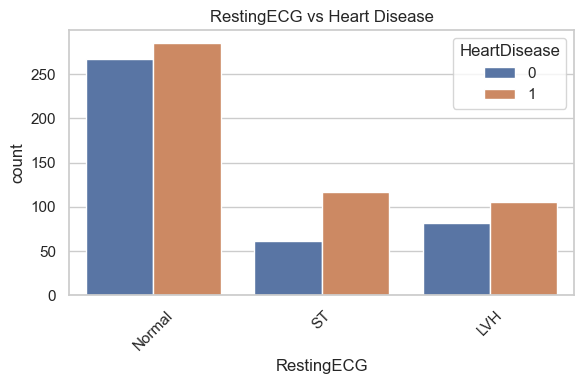

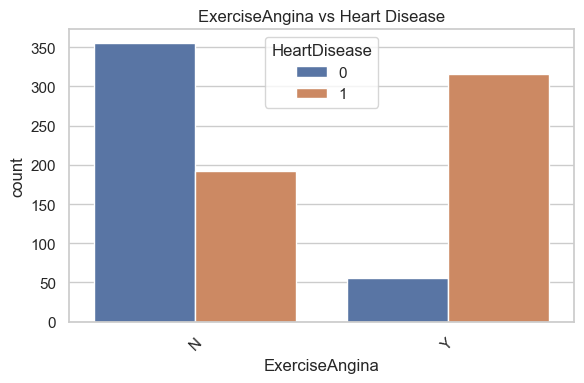

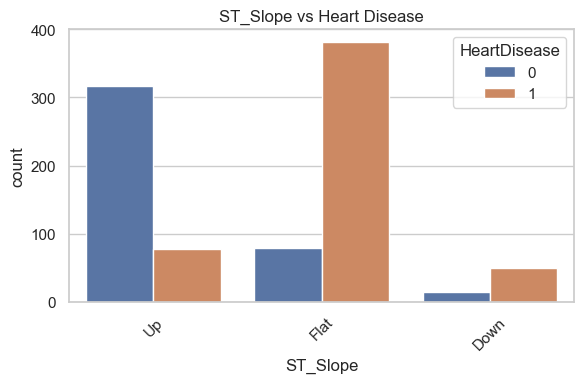

In [13]:
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue="HeartDisease")
    plt.title(f"{col} vs Heart Disease")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Column types
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing: One-hot encode categorical, scale numeric
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


📊 Evaluation: Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



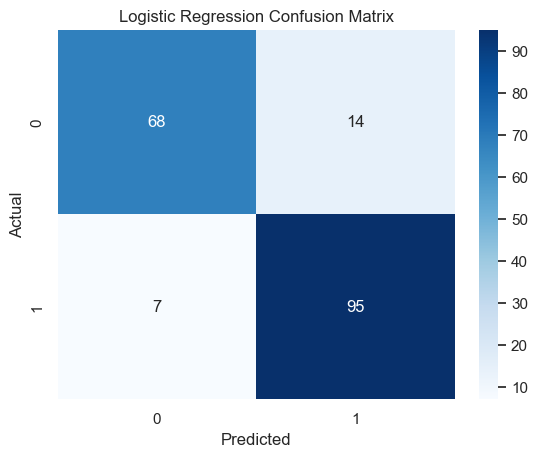


📊 Evaluation: Random Forest
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        82
           1       0.88      0.89      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



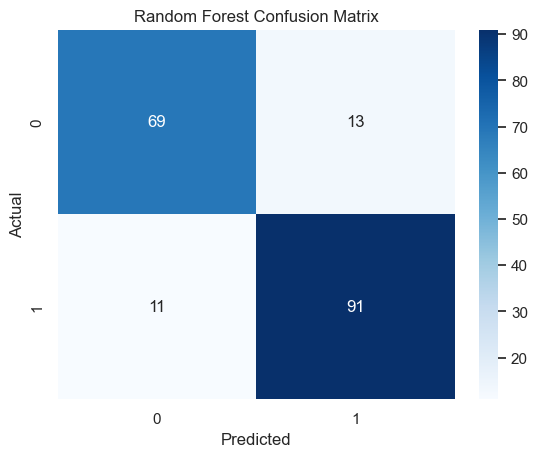

In [17]:
from sklearn.pipeline import make_pipeline

#Logistic Regression Pipeline
logreg_pipeline = make_pipeline(preprocessor, LogisticRegression())
logreg_pipeline.fit(X_train, y_train)

# Random Forest Pipeline
rf_pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))
rf_pipeline.fit(X_train, y_train)

# Predictions
log_preds = logreg_pipeline.predict(X_test)
rf_preds = rf_pipeline.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 Evaluation: {model_name}")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate both models
evaluate_model(y_test, log_preds, "Logistic Regression")
evaluate_model(y_test, rf_preds, "Random Forest")

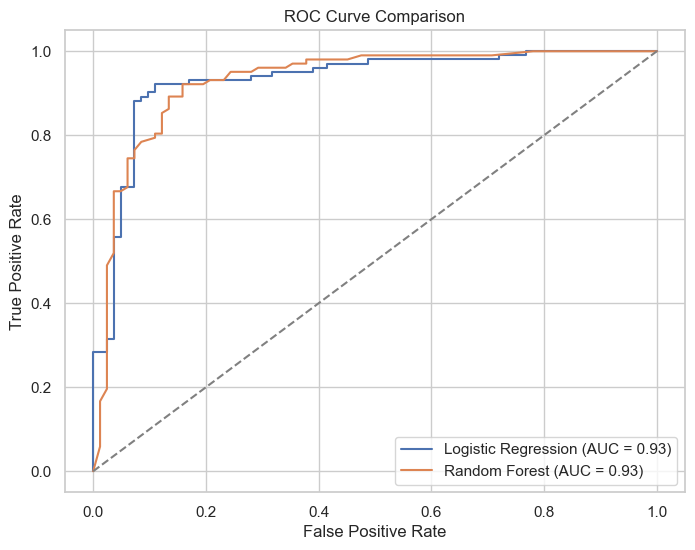

In [19]:
log_probs = logreg_pipeline.predict_proba(X_test)[:,1]
rf_probs = rf_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

log_auc = roc_auc_score(y_test, log_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(log_fpr, log_tpr, label=f"Logistic Regression (AUC = {log_auc:.2f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [37]:
import joblib

joblib.dump(rf_pipeline, 'rf_heart_model.pkl')
print("Model saved!")


Model saved!
